In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [328]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
file = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
file = np.array(file[-1792:][:5]).astype(np.uint8)
print(file.shape)
#for i in range(len(file)):
    #processed = np.append(np.array(Image.fromarray(file[i], "RGB").convert("L")), processed)
processed = file.reshape(5, 64, 64, 3)
test = np.array([processed[-1]])
processed = processed[:4]
print(processed[0].shape)


(5, 64, 64, 3)
(64, 64, 3)


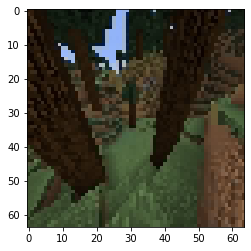

In [329]:
plt.imshow(processed[0])

In [202]:

en = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[64,64]),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(30, activation="tanh"),
])


de = keras.models.Sequential([
    keras.layers.Dense(100, activation="tanh", input_shape=[30]),
    keras.layers.Dense(64 * 64, activation="sigmoid"),
    keras.layers.Reshape([64,64])
])

en_de = keras.models.Sequential([en, de])
for layer in en.layers:
    print(layer.get_output_at(0).get_shape().as_list())
for layer in de.layers:
    print(layer.get_output_at(0).get_shape().as_list())

en_de.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

history = en_de.fit(processed, processed, epochs=1, validation_data=(processed, processed))

en_de.summary()

[None, 4096]
[None, 100]
[None, 30]
[None, 100]
[None, 4096]
[None, 64, 64]
1/1 [==============================] - 1s 665ms/step - loss: 0.6729 - val_loss: -12.5678
Model: "sequential_372"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_370 (Sequential)  (None, 30)                412730    
_________________________________________________________________
sequential_371 (Sequential)  (None, 64, 64)            416796    
Total params: 829,526
Trainable params: 829,526
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Dense Autoencoder

Original image:


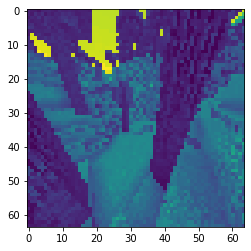

AI vision:


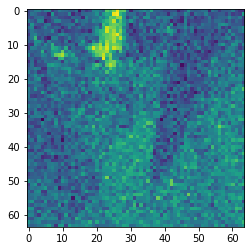

In [206]:
image = en_de.predict([test])
#Original image
print("Original image:")
plt.imshow(processed[0])
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(image.reshape(64,64))
plt.show()

In [207]:
en_de.save("MineAutoencoder.h5")

In [269]:
#Dense GAN
codings_size = 64

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="tanh", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="tanh"),
    keras.layers.Dense(64*64, activation="sigmoid"),
    keras.layers.Reshape([64,64])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[64,64]),
    keras.layers.Dense(150, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

for layer in generator.layers:
    print(layer.get_output_at(0).get_shape().as_list())
for layer in discriminator.layers:
    print(layer.get_output_at(0).get_shape().as_list())

discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

[None, 100]
[None, 150]
[None, 4096]
[None, 64, 64]
[None, 4096]
[None, 150]
[None, 100]
[None, 1]


In [335]:
cnn_codings = 200

cnn_gen = keras.models.Sequential([
    keras.layers.Dense(16*16*128, input_shape=[cnn_codings]),
    keras.layers.Reshape([16,16,128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                activation="tanh"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(3, kernel_size=5, strides=2, padding="same",
                                 activation="tanh")
])

cnn_dis = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2),
                       input_shape=[64,64,3]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                       activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

for layer in cnn_gen.layers:
    print(layer.get_output_at(0).get_shape().as_list())
for layer in cnn_dis.layers:
    print(layer.get_output_at(0).get_shape().as_list())

cnn_gan = keras.models.Sequential([cnn_gen, cnn_dis])
cnn_dis.compile(loss="binary_crossentropy", optimizer="rmsprop")
cnn_dis.trainable = False
cnn_gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

[None, 32768]
[None, 16, 16, 128]
[None, 16, 16, 128]
[None, 32, 32, 64]
[None, 32, 32, 64]
[None, 64, 64, 3]
[None, 32, 32, 64]
[None, 32, 32, 64]
[None, 16, 16, 128]
[None, 16, 16, 128]
[None, 32768]
[None, 1]


uint8
<PrefetchDataset shapes: (1, 64, 64, 3), types: tf.uint8>
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


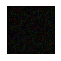

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


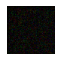

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


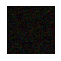

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


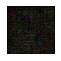

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


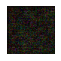

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


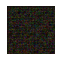

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


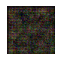

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


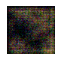

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


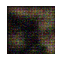

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


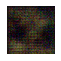

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


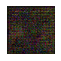

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


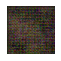

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


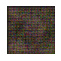

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


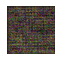

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


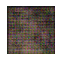

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 64, 64, 3)
(2, 1)


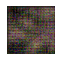

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


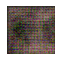

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


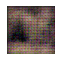

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


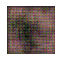

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


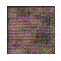

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


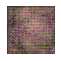

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


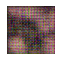

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(2, 1)


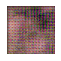

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


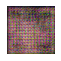

(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)
(2, 64, 64, 3)
(2, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


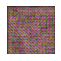

In [336]:
batch_size = 1
processed = np.array(processed).reshape(-1,64,64,3)
dataset = tf.data.Dataset.from_tensor_slices(processed)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
print(processed.dtype)
print(dataset)

def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=25):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            #training the discriminator
            X_batch = tf.cast(X_batch, tf.float32)
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = cnn_gen(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            print(X_fake_and_real.shape)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            print(y1.shape)
            cnn_dis.trainable = True
            cnn_dis.train_on_batch(X_fake_and_real, y1)
            #training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            cnn_dis.trainable = False
            cnn_gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                    
        plt.show()
        
train_gan(cnn_gan, dataset, batch_size, cnn_codings)

Original image:


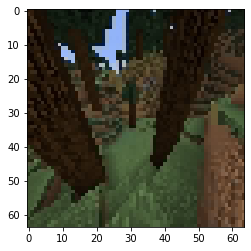

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AI vision:


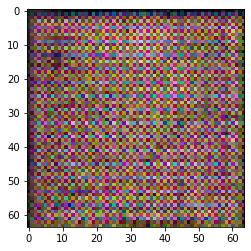

In [338]:
#GAN tester
noise = tf.random.normal(shape=[batch_size, cnn_codings])
gan_img = cnn_gen.predict(noise)

print("Original image:")
plt.imshow(processed[0].reshape(64,64,3))
plt.show()
#AI autoencoder vision
print("AI vision:")
plt.imshow(gan_img.reshape(64,64,3))
plt.show()